# Dataset Information

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE PROJECTS/data hack/train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**checking the missing values**

In [3]:
(df.isnull().sum()/len(df))*100


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

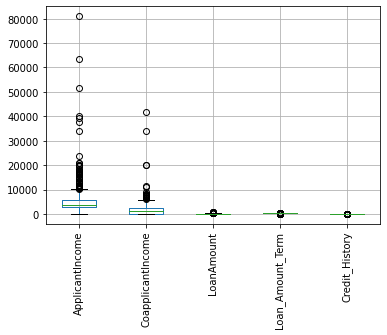

In [4]:
df.boxplot()

plt.xticks(rotation=90)

In [5]:
#IQR

Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1-1.5*IQR
UL = Q3+1.5*IQR
df['ApplicantIncome']=df['ApplicantIncome'][~((df['ApplicantIncome']<LL) | (df['ApplicantIncome']>UL))]

In [6]:
#IQR

Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1-1.5*IQR
UL = Q3+1.5*IQR
df['CoapplicantIncome']=df['CoapplicantIncome'][~((df['CoapplicantIncome']<LL) | (df['CoapplicantIncome']>UL))]

In [7]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1-1.5*IQR
UL = Q3+1.5*IQR
df['LoanAmount']=df['LoanAmount'][~((df['LoanAmount']<LL) | (df['LoanAmount']>UL))]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

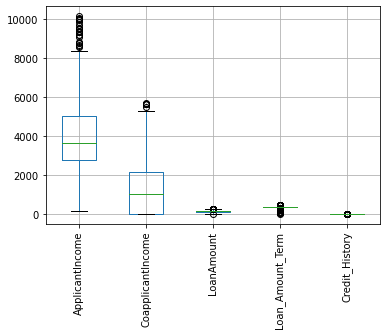

In [8]:
df.boxplot()

plt.xticks(rotation=90)

In [9]:
(df.isnull().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      8.143322
CoapplicantIncome    2.931596
LoanAmount           9.934853
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           61
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    564 non-null    float64
 7   CoapplicantIncome  596 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# **Treating missing values for Categorical columns**

In [12]:
df.Gender.mode()

0    Male
dtype: object

In [13]:
df.Married.mode()

0    Yes
dtype: object

In [14]:
df.Dependents.mode()

0    0
dtype: object

In [15]:
df.Education.mode()

0    Graduate
dtype: object

In [16]:
df.Self_Employed.mode()

0    No
dtype: object

In [17]:
df.Property_Area.mode()

0    Semiurban
dtype: object

In [18]:
df.Loan_Status.mode()

0    Y
dtype: object

In [19]:
df['Gender'].fillna('Male',inplace=True)

In [20]:
df['Married'].fillna('Yes',inplace=True)

In [21]:
df['Dependents'].fillna('0',inplace=True)

In [22]:
df['Self_Employed'].fillna('No',inplace=True)

In [23]:
df['Property_Area'].fillna('Semiurban',inplace=True)

In [24]:
df['Loan_Status'].fillna('Y',inplace=True)

# Treating Missing Values In Numerical Columns

In [25]:
for i in df.iloc[:,6:11]:
  df[i]=df[i].replace(np.NaN,df[i].mean())

In [26]:
#All the missing values has been treated!
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


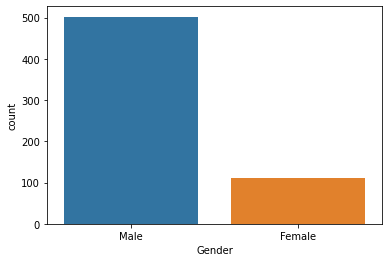

In [27]:
#Categorical Attributes Visualization
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


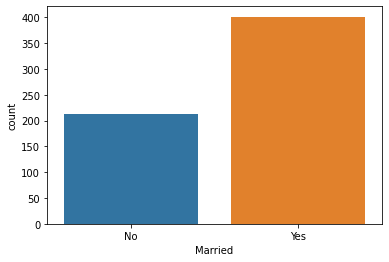

In [28]:
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


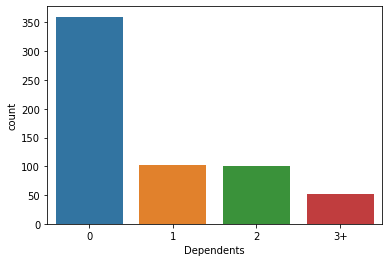

In [29]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


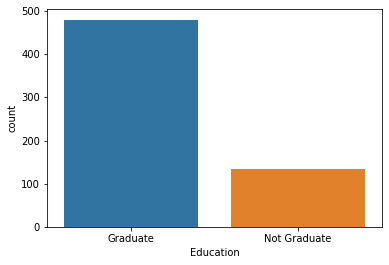

In [30]:
sns.countplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


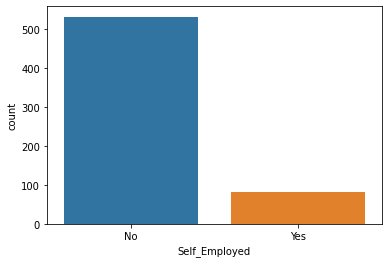

In [31]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


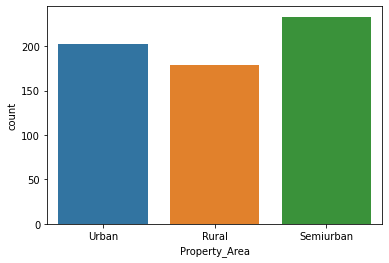

In [32]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


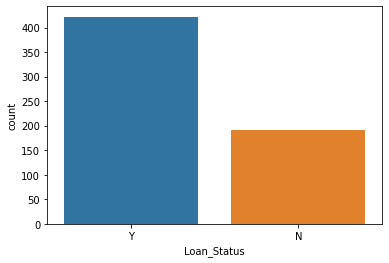

In [33]:
sns.countplot(df['Loan_Status'])

In [34]:
# Numerical Attributes Visualization

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


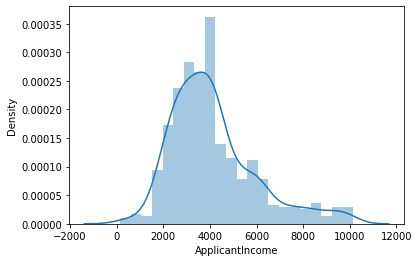

In [36]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


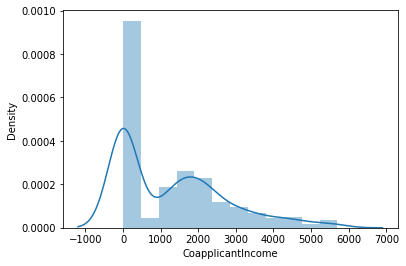

In [37]:
sns.distplot(df['CoapplicantIncome']) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


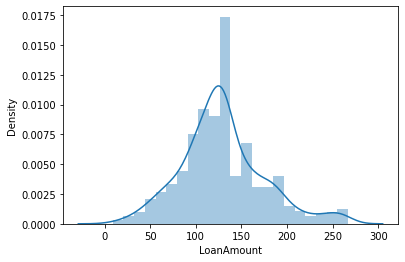

In [38]:
sns.distplot(df["LoanAmount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


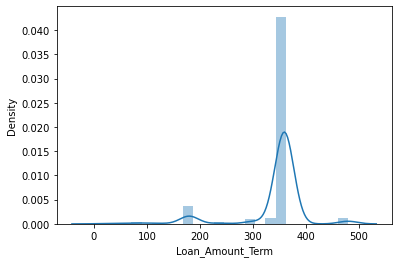

In [39]:
sns.distplot(df["Loan_Amount_Term"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


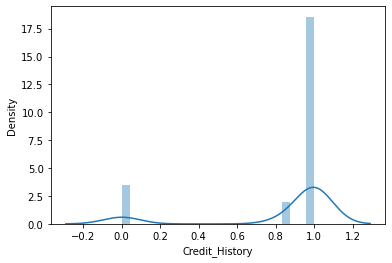

In [40]:
sns.distplot(df["Credit_History"])

In [41]:
# Creation of new Attributes
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,129.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


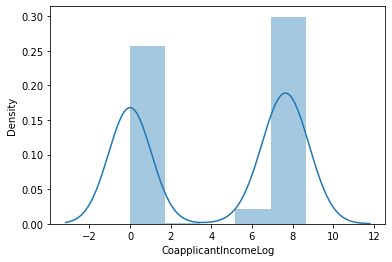

In [42]:
#log
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


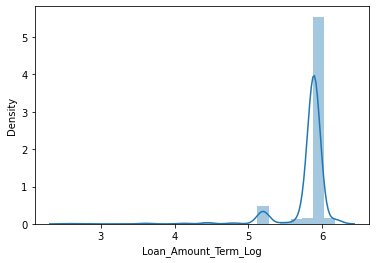

In [43]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

# Corelation Matrix

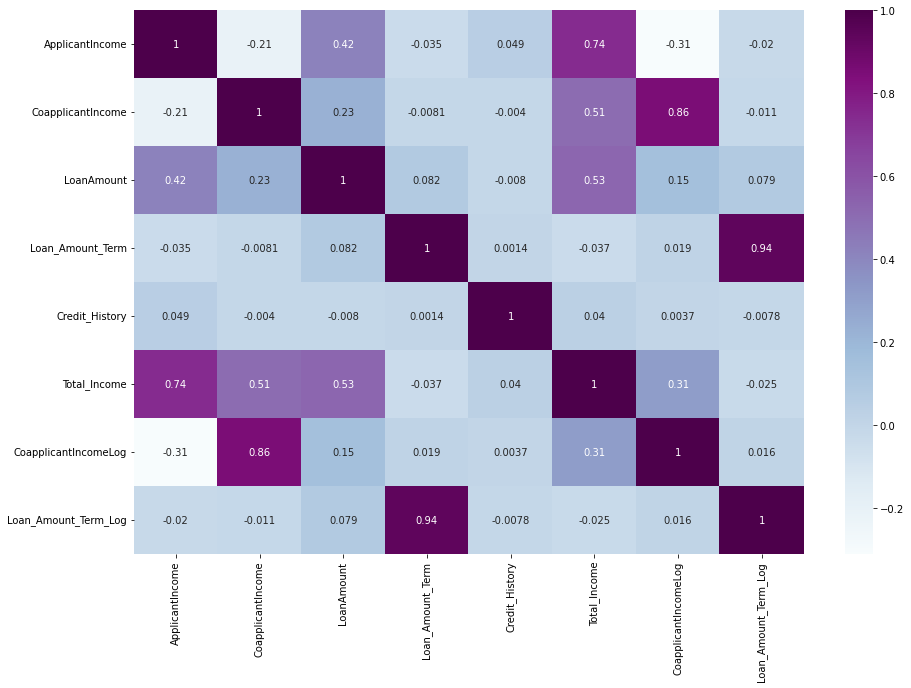

In [44]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    float64
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  Total_Income          614 non-null    float64
 14  CoapplicantIncomeLog  614 non-null    float64
 15  Loan_Amount_Term_Log  6

In [46]:
#dropping unnecessary columns
cols =['CoapplicantIncome','Loan_Amount_Term','Loan_ID','CoapplicantIncomeLog'] 
df = df.drop(columns=cols, axis=1)


In [47]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,5849.000000,129.0,1.000000,Urban,Y,5849.000000,5.888878
1,Male,Yes,1,Graduate,No,4583.000000,128.0,1.000000,Rural,N,6091.000000,5.888878
2,Male,Yes,0,Graduate,Yes,3000.000000,66.0,1.000000,Urban,Y,3000.000000,5.888878
3,Male,Yes,0,Not Graduate,No,2583.000000,120.0,1.000000,Urban,Y,4941.000000,5.888878
4,Male,No,0,Graduate,No,6000.000000,141.0,1.000000,Urban,Y,6000.000000,5.888878
5,Male,Yes,2,Graduate,Yes,5417.000000,267.0,1.000000,Urban,Y,9613.000000,5.888878
6,Male,Yes,0,Not Graduate,No,2333.000000,95.0,1.000000,Urban,Y,3849.000000,5.888878
7,Male,Yes,3+,Graduate,No,3036.000000,158.0,0.000000,Semiurban,N,5540.000000,5.888878
8,Male,Yes,2,Graduate,No,4006.000000,168.0,1.000000,Urban,Y,5532.000000,5.888878
9,Male,Yes,1,Graduate,No,4124.723404,129.0,1.000000,Semiurban,N,5413.852465,5.888878


# Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [57]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Amount_Term_Log
0,1,0,0,0,0,5849.0,129.0,1.0,2,1,5849.0,5.888878
1,1,1,1,0,0,4583.0,128.0,1.0,0,0,6091.0,5.888878
2,1,1,0,0,1,3000.0,66.0,1.0,2,1,3000.0,5.888878
3,1,1,0,1,0,2583.0,120.0,1.0,2,1,4941.0,5.888878
4,1,0,0,0,0,6000.0,141.0,1.0,2,1,6000.0,5.888878


#Education (0- Graduate, 1- Not Graduate)
#Self Employed - (0- no, 1- yes)
#property area - (semiurban- 1, rural- 0, urban = 2 )
#Loan status - (1- yes, 0 - no)
#Gener (1- male , 0- female)
#married  (0- no, 1- yes)

# **Train - Test Split**

In [58]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Model Training

In [59]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.94495535119286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 67.53246753246754
Cross validation is 72.31507397041183


In [62]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 78.34466213514595


In [63]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 74.02597402597402
Cross validation is 77.20245235239238


# Hyperparameter tuning


In [64]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 80.45981607357058


#Confusion Matrix


In [68]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]])

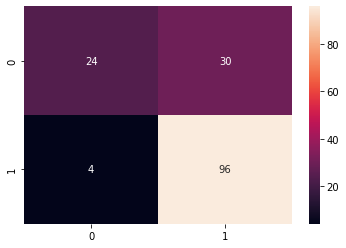

In [70]:
sns.heatmap(cm, annot=True)


A confusion matrix is a summary of classification problem prediction outcomes. The number of right and wrong predictions is summarised with count values and divided by class. It provides information not only on the errors produced by a classifier, but also about the sorts of errors made.